In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

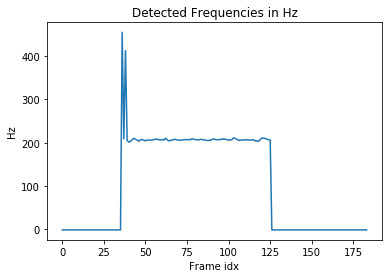

In [57]:
FRAME_SIZE = 2048
e_s = 3.6*(10**9)

################## YOUR CODE HERE ######################
def ece420ProcessFrame(frame, Fs):
    freq = -1
    isVoiced = 0
    
    e = 0
    for x in frame:
        e += x**2
    #### YOUR CODE HERE ####
    if e >= e_s:
        isVoiced = 1
        frame_fft = fft(frame)
        autocor = ifft(frame_fft*np.conj(frame_fft))
        autocor = autocor[0:int(FRAME_SIZE/2)]/autocor[0]

    #     plt.plot(autocor)

        zero_index = -1
        i = 0
        while zero_index < 0:
            if np.real(autocor[i])<0:
                zero_index = i

            else:
                i += 1

    #     print(zero_index)

        peak_index = []
        peak_val = []
        for i in range(zero_index,len(autocor)-3):
            if autocor[i] > autocor[i-3] and autocor[i] > autocor[i+3]:
                peak_index.append(i)
                peak_val.append(autocor[i])

    #     plt.scatter(peak_index,peak_val)

    #     print(peak_index[0])

        freq = Fs/peak_index[np.argmax(peak_val)]
#     print(freq)
    return freq


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

# frame = data[90 * FRAME_SIZE : 91 * FRAME_SIZE]
# ece420ProcessFrame(frame.astype(float), Fs)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)


plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()

1. The largest peak outside of the 0Hz region is selected as the dominant frequency.
2. We looked for the largest peak after the first zero-crossing.
3. For one thing, 2048 samples is a power of two, thus it is a good value for efficiently computing FFTs and IFFTs. In addition, if the frame size is too short, there will be fewer bins so the output will be less accurate. If the frame is too long, it will take a long time to compute, and in the case where there is a changing pitch, the autocorrelation may not find any peaks because the circular convolution will align dissimilar frequencies, so any noise, harmonics, or other incorrect peaks will be amplified.